In [12]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
games = '1126splittrainslimall.csv'
gamesdf = pd.read_csv(games, header=0, index_col=0)


In [14]:
data = gamesdf

y = data.iloc[:, -1]
X = data.drop(data.columns[[-1, 0, 1]], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_indices = X.index.values
y_indices = y.index.values


In [37]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [16], 
    'n_estimators': [ 300],  
    'max_features': ['sqrt'],
    'bootstrap': [False]
  
}

forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest, param_grid, scoring='neg_mean_squared_error', cv=3)

grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate on the validation set
validation_score = grid_search.score(X_test, y_test)

# Print or use the results as needed
#print("Best Parameters: ", best_params)
print("Best Negative Mean Squared Error: ", -grid_search.best_score_)
print("Validation Score: ", -validation_score)

Best Negative Mean Squared Error:  1816.8481908908109
Validation Score:  1287.2518771607656


C:\Users\Nick_\AppData\Local\Temp\ipykernel_1704\2627261818.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')


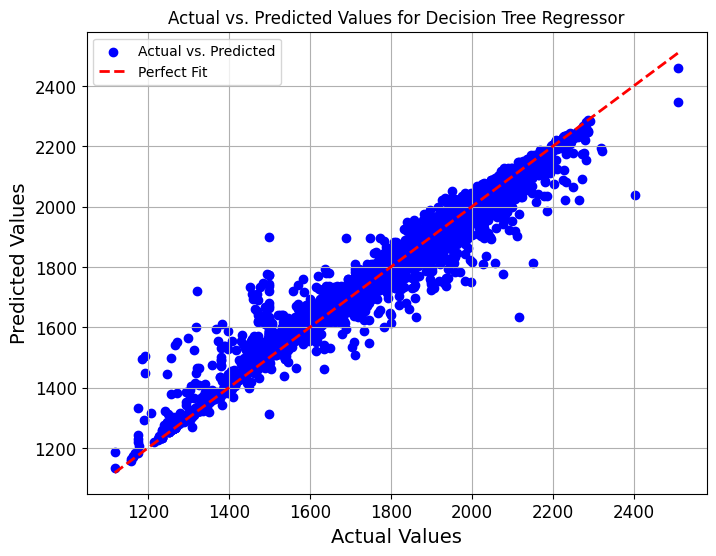

In [38]:
import matplotlib.pyplot as plt

y_pred = grid_search.predict(X_test)

# Assuming you have the actual target values in y_test and predicted values in y_pred (from the best model)

# Create a scatter plot to show the best-fit predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regressor')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [14]:
import joblib
joblib.dump(grid_search, 'scrabble1126.pkl')

['scrabble1125.pkl']

In [39]:
gamestest11 = '1126splittesttrim.csv'
gamestestdf11 = pd.read_csv(gamestest11, header=0, index_col=0)

print(gamestestdf11)

        Bot_nickname Player_nickname  initial_time_seconds  rating_mode  \
game_id                                                                   
51975        STEEBot        Jammiwam                   720            1   
9861         STEEBot         DGAMBLE                  1200            1   
4808         STEEBot        Jammiwam                   720            1   
28557        STEEBot        Jammiwam                   720            1   
37073        STEEBot        Jammiwam                   720            1   
...              ...             ...                   ...          ...   
22119       HastyBot           Sphil                   600            1   
53752       HastyBot       magichour                  1500            1   
41096       HastyBot          pterin                  1080            1   
53040       HastyBot           Sphil                   600            1   
62014       HastyBot           Sphil                   600            1   

         Player_max_poin

In [40]:
datatest12 = gamestestdf11

ytest1 = datatest12.iloc[:, -1]
Xtest1 = datatest12.drop(datatest12.columns[[-1, 0, 1]], axis=1)

In [41]:
X_new_scaled = scaler.transform(Xtest1)

In [42]:
y_predtest = grid_search.predict(X_new_scaled)

result_df = pd.DataFrame({'game_id': Xtest1.index, 'rating': y_predtest})

# Save the DataFrame to an Excel file
result_df.to_csv('predictions1126rfl.csv', index=False)

In [47]:
print(X_train)

[[-0.08631934  0.45443209  0.86279397 ...  0.95170939  0.40763419
   0.37480133]
 [-0.08631934  0.45443209 -0.25464394 ... -0.41796335  0.10489686
   1.64176201]
 [-0.95921297  0.45443209  0.61987269 ... -0.35641397 -0.31694156
  -0.49288199]
 ...
 [-1.27662884  0.45443209  3.63209662 ...  0.52409877  0.48579366
  -0.11553509]
 [-0.56244314  0.45443209 -2.29518273 ... -0.5788198   0.41094889
  -0.37965408]
 [-0.08631934  0.45443209  0.47411992 ...  1.61147054  0.32071546
  -0.48954475]]


In [45]:

# If X_train is a NumPy array, get feature names differently
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_estimator.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display or save the feature importances
print(feature_importance_df)

# Plotting a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'